# Project: Stock Price Predictor

In this project, our aim is to build up a model and accurately predict the future return of a stock, as well as suggesting buying and selling points of stocks. The project is divided into 2 parts, first building the model, and next giving suggestions based in indexes. We will be using linear regression technique to build our benchmark model and predict the returns, then we will be using MACD index and RSI index. We will be using yahoo finance as our data source. 


## Get the Data

We first download the data from yahoo finance, and save the data to local storage. 

In [1]:
import pandas as pd
import datetime
import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install lstm
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install yfinance

import yfinance as yf

tickers = ['AES', 'UNH', 'AAPL', 'PG', 'PLD', 'DLR', 'BAC', 'TMO', 'JNJ', 'DUK', 'NKE', 'CVS', 'SWK', 'SHW', 'MSFT', 'DISH', 'GIS', 'MA', 'CAG', 'BBY']

index_name = "AMC"
data = yf.download(index_name, '2010-01-01','2023-12-07', interval="1d")
file_name = index_name + ".csv"
data.to_csv(file_name,index = False)
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-12-18  191.800003  197.899994  189.000000  189.000000  182.944519   
2013-12-19  189.000000  194.899994  188.100006  194.899994  188.655563   
2013-12-20  196.500000  197.699997  194.000000  196.800003  190.494675   
2013-12-23  197.899994  199.899994  195.000000  197.399994  191.075439   
2013-12-24  197.399994  198.199997  195.000000  195.300003  189.042740   
...                ...         ...         ...         ...         ...   
2023-11-30    7.150000    7.180000    6.640000    6.650000    6.650000   
2023-12-01    6.660000    6.990000    6.530000    6.860000    6.860000   
2023-12-04    6.870000    7.540000    6.810000    7.490000    7.490000   
2023-12-05    7.420000    7.450000    6.880000    7.020000    7.020000   
2023-12-06    7.070000    7.150000    6.770

## Preprocess the data

We want to normalize the data for better prediction, so we need to process the data.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv(file_name)
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Open        High         Low       Close   Adj Close  Volume
0  191.800003  197.899994  189.000000  189.000000  182.944519  545720
1  189.000000  194.899994  188.100006  194.899994  188.655563  160540
2  196.500000  197.699997  194.000000  196.800003  190.494675   73710
3  197.899994  199.899994  195.000000  197.399994  191.075439   69810
4  197.399994  198.199997  195.000000  195.300003  189.042740   21370


Open   --- mean : 182.11928253527321   	 Std:  111.0895596746381   	 Max:  613.4000244140625   	 Min:  6.659999847412109
High   --- mean : 186.8165881402847   	 Std:  114.65021454098584   	 Max:  726.2000122070312   	 Min:  6.800000190734863
Low    --- mean : 177.28563966994363   	 Std:  108.37756848016289   	 Max:  568.5   	 Min:  6.519999980926514
Close  --- mean : 181.89534467470602   	 Std:  111.31801470913881   	 Max:  625.5   	 Min:  6.650000095367432
Volume --- mean : 2651959.7010761257   	 Std:  7183126.842710417   	 Max:  122234250   	 Min:  3430


**Remove Unncessary data, and keep only open, close, volume** 

In [3]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

E:\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   Item        Open       Close  Volume
0     0  191.800003  189.000000  545720
1     1  189.000000  194.899994  160540
2     2  196.500000  196.800003   73710
3     3  197.899994  197.399994   69810
4     4  197.399994  195.300003   21370
---
      Item  Open  Close    Volume
2503  2503  6.95   7.17  32449100
2504  2504  7.15   6.65  20347100
2505  2505  6.66   6.86  23986200
2506  2506  6.87   7.49  30553700
2507  2507  7.42   7.02  21060400


**Now we want to visualize the data**

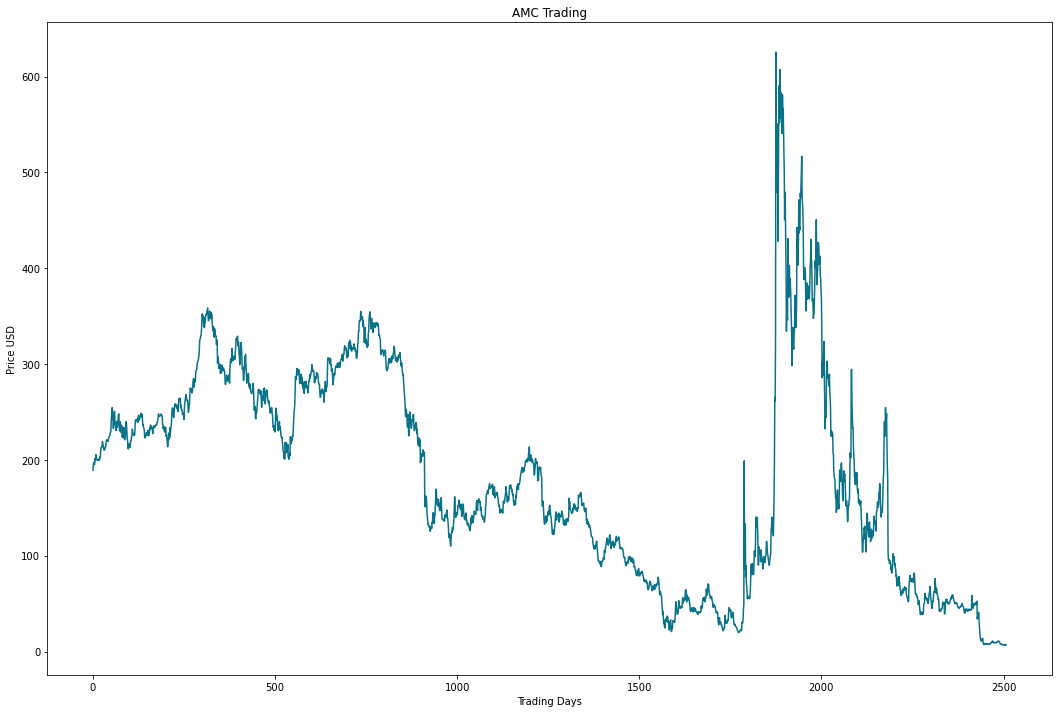

In [4]:
import visualize

visualize.plot_basic(stocks, title=index_name+" Trading")

**Normalize the data using minmaxscaler function** 

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['Open', 'Close', 'Volume']
stocks[numerical] = scaler.fit_transform(stocks[numerical])
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.305139  0.294659  0.004437
1     1  0.300524  0.304193  0.001285
2     2  0.312885  0.307263  0.000575
3     3  0.315193  0.308233  0.000543
4     4  0.314369  0.304840  0.000147


Open   --- mean : 0.2892986649064523   	 Std:  0.18303834368613117   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.28329185315398425   	 Std:  0.1798259150333878   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.021621378501461033   	 Std:  0.05873168260457878   	 Max:  1.0000000000000002   	 Min:  0.0


**Visualize the data again**

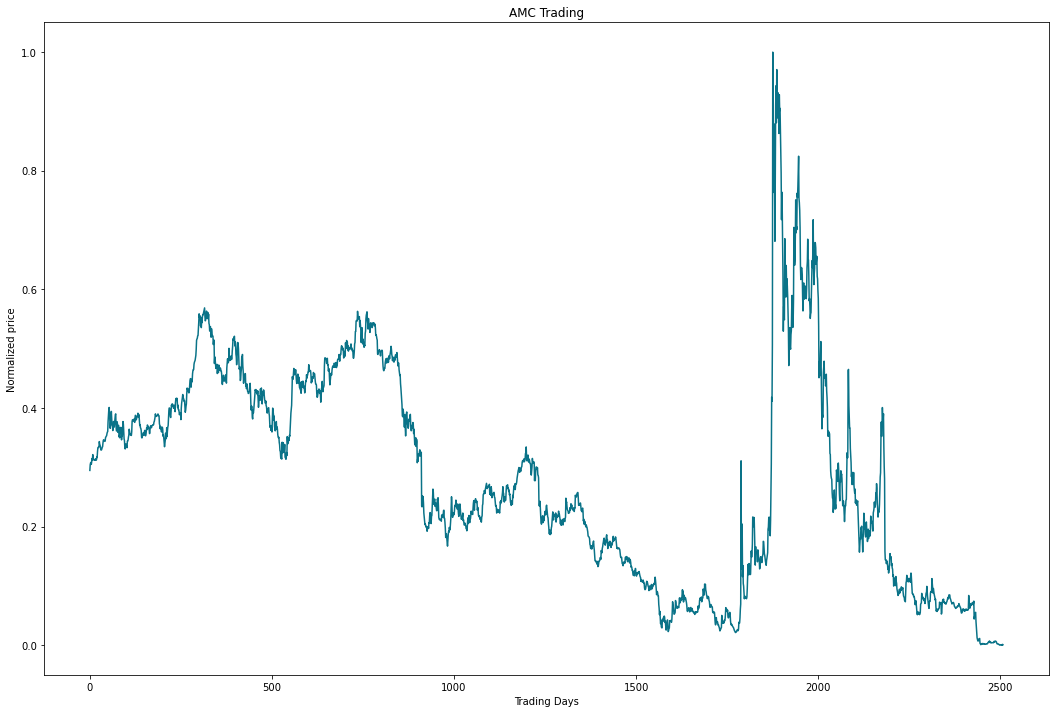

In [6]:
visualize.plot_basic(stocks, title=index_name+" Trading", y_label="Normalized price")

**Save the processed data** 

In [7]:
file_name = file_name[:-4] + "_preprocessed.csv"
stocks.to_csv(file_name,index= False)

## Long-Sort Term Memory Model

We use LSTM to train a more accurate model, and predict the returns.

### Basic LSTM Model

First lets build a basic LSTM model. We would use keras libraries to do so.

In [8]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv(file_name)
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())
print(stocks_data)

,Open,Close,Volume
0,0.305139,0.294659,0.004437
1,0.300524,0.304193,0.001285
2,0.312885,0.307263,0.000575
3,0.315193,0.308233,0.000543
4,0.314369,0.304840,0.000147


          Open     Close    Volume
0     0.305139  0.294659  0.004437
1     0.300524  0.304193  0.001285
2     0.312885  0.307263  0.000575
3     0.315193  0.308233  0.000543
4     0.314369  0.304840  0.000147
...        ...       ...       ...
2503  0.000478  0.000840  0.265446
2504  0.000808  0.000000  0.166437
2505  0.000000  0.000339  0.196209
2506  0.000346  0.001357  0.249939
2507  0.001253  0.000598  0.172272

[2508 rows x 3 columns]


**Split train and test data sets for lstm model** 

In [9]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (1952, 50, 3)
y_train (1952,)
x_test (446, 50, 3)
y_test (446,)


**Build a basic Long-Short Term Memory model** 

In [10]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)



compilation time :  0.03415846824645996


**Train the model** 

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)


58/58 [==============================] - 5s 34ms/step - loss: 0.0110 - val_loss: 0.0091


**make prediction using test data** 

In [12]:
predictions = model.predict(X_test)

14/14 [==============================] - 1s 8ms/step


**Visualize the result** 

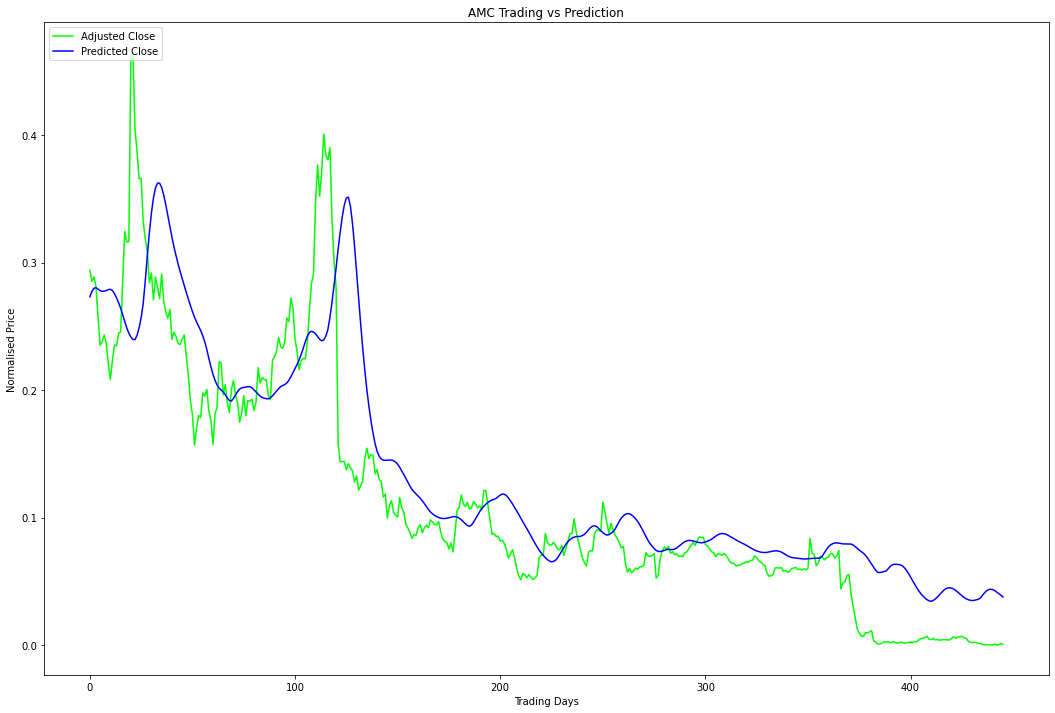

In [13]:
vs.plot_lstm_prediction(y_test,predictions, title=index_name+" Trading vs Prediction", y_label="Normalised Price")

**Get the test score** 

In [14]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00347323 MSE (0.05893409 RMSE)
Test Score: 0.00272216 MSE (0.05217435 RMSE)


### Improved LSTM Model

**Build an improved LSTM model** 

In [15]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.003937482833862305


**Train improved LSTM model** 

In [16]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
19/19 - 4s - loss: 0.0208 - val_loss: 0.0093 - 4s/epoch - 228ms/step
Epoch 2/5
19/19 - 1s - loss: 0.0053 - val_loss: 0.0092 - 915ms/epoch - 48ms/step
Epoch 3/5
19/19 - 1s - loss: 0.0037 - val_loss: 0.0093 - 987ms/epoch - 52ms/step
Epoch 4/5
19/19 - 1s - loss: 0.0035 - val_loss: 0.0089 - 991ms/epoch - 52ms/step
Epoch 5/5
19/19 - 1s - loss: 0.0034 - val_loss: 0.0098 - 953ms/epoch - 50ms/step


**Make prediction on improved LSTM model** 

In [17]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)
print(pd.DataFrame(predictions).shape)

5/5 [==============================] - 1s 16ms/step
(446, 1)


**Visualize the results** 

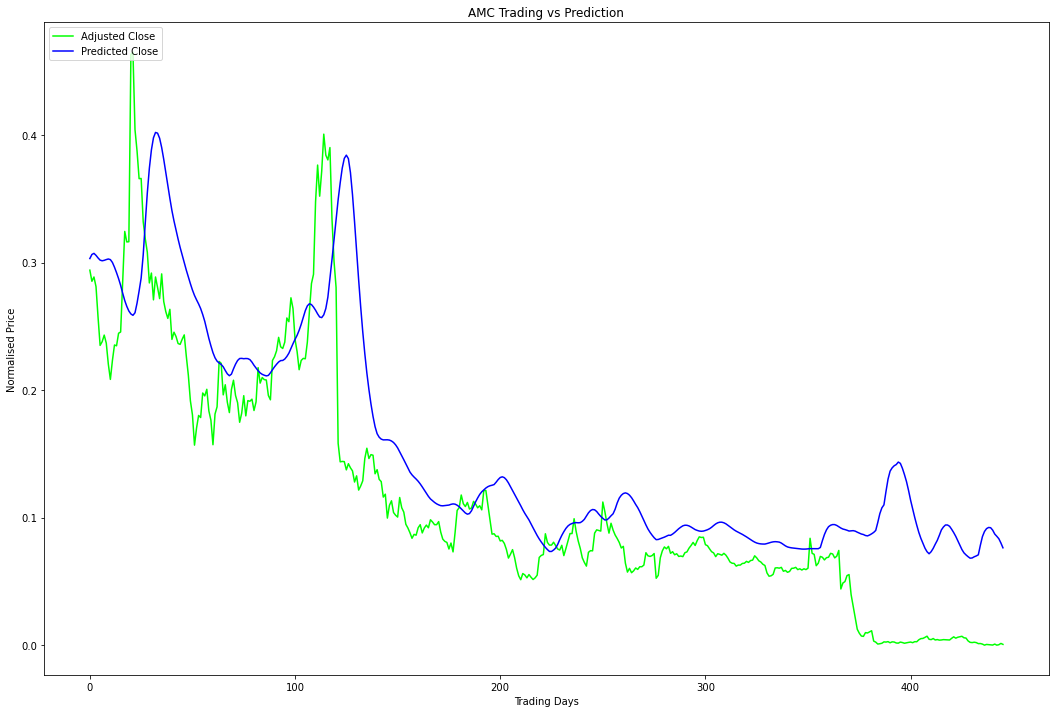

In [18]:
vs.plot_lstm_prediction(y_test,predictions,title=index_name+" Trading vs Prediction", y_label="Normalised Price")

**Get the test score** 

In [19]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00314901 MSE (0.05611600 RMSE)
Test Score: 0.00443754 MSE (0.06661485 RMSE)


**Get the Delta Price**

In [20]:
range_ = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range_[1]-range_[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.004438 - RMSE * Adjusted Close Range


## Getting the annualized predicted return


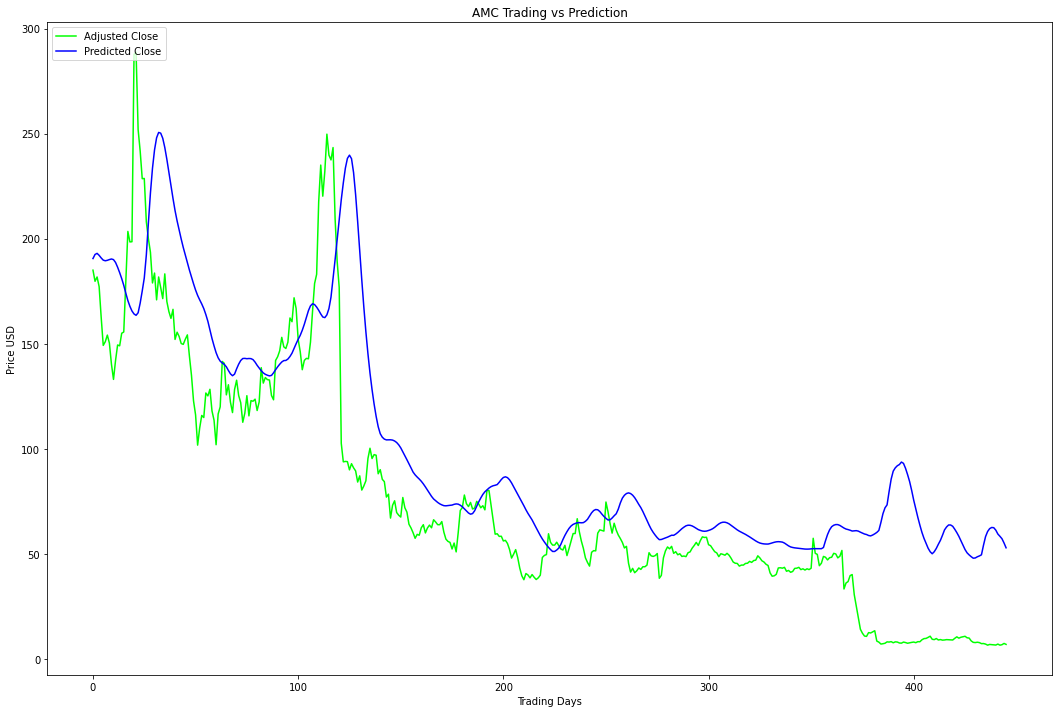

In [21]:
tmp = pd.DataFrame(predictions, columns=["price"])
tmp["tmp1"] = np.nan
tmp["tmp2"] = np.nan

returndf = scaler.inverse_transform(tmp)[:, [0]]
tmp = pd.DataFrame(y_test, columns=["price"])
tmp["tmp1"] = np.nan
tmp["tmp2"] = np.nan
returntest = scaler.inverse_transform(tmp)[:, [0]]
vs.plot_lstm_prediction(returntest,returndf,title=index_name+" Trading vs Prediction")
tmp = pd.DataFrame(returndf, columns=["price"])
pd.concat([pd.read_csv('all_price.csv'), tmp], axis=1) \
  .to_csv('all_price.csv', header=True, index=False)

# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [22]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# # Generate predictions 
# predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.878773  0.905268  0.094819
1  0.905493  0.905763  0.032540
2  0.905493  0.890923  0.027498
3  0.890649  0.882513  0.021253
4  0.882237  0.895374  0.018493
(2768, 1, 3)
(2768,)
Test Score: 0.3563 MSE (0.5969 RMSE)


# Getting the indexes

In this part we would calculate the indexes based on our predictions

**Calculate the RSI and MACD indexes**

In [23]:
import network as nt
import indicators as ind
import mpl_finance_ext as mfe
import matplotlib.pyplot as plt
predict = pd.DataFrame(returndf, columns=["Close"])
i_counter = 0
item = []
for i in range(len(predict)):
    item.append(i_counter)
    i_counter += 1
predict["Item"] = item
data = ind.relative_strength_index(df=predict, n=14)
data = ind.macd(df=predict, n_fast=12, n_slow=26)


Instructions for updating:
non-resource variables are not supported in the long term
          Close  Item
0    190.580562     0
1    192.524188     1
2    193.045246     2
3    192.102871     3
4    190.862030     4
..          ...   ...
441   59.522624   441
442   58.449962   442
443   57.293235   443
444   55.273510   444
445   52.973473   445

[446 rows x 2 columns]
1      100.000000
2      100.000000
3       96.213621
4       91.311045
5       87.296919
          ...    
441     54.194117
442     51.466557
443     48.624519
444     44.050464
445     39.494221
Name: Close, Length: 445, dtype: float64


**Get the length of the graph**

In [24]:
test_dataset_size = 0.05

dataset_train_length = len(data.index) -int(len(data.index) * test_dataset_size)
print(data)

          Close  Item      RSI_14  MACD_12_26  MACDsign_12_26
0    190.580562     0         NaN         NaN             NaN
1    192.524188     1  100.000000         NaN             NaN
2    193.045246     2  100.000000         NaN             NaN
3    192.102871     3   96.213621         NaN             NaN
4    190.862030     4   91.311045         NaN             NaN
..          ...   ...         ...         ...             ...
441   59.522624   441   54.194117    0.447967       -1.076001
442   58.449962   442   51.466557    0.434333       -0.773935
443   57.293235   443   48.624519    0.326426       -0.553862
444   55.273510   444   44.050464    0.077046       -0.427681
445   52.973473   445   39.494221   -0.302694       -0.402683

[446 rows x 5 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Buying RSI-------------------------
     Item
23     23
73     73
89     89
187   187
229   229
282   282
333   333
356   356
412   412
432   432
Selling RSI-------------------------
     Item
12     12
37     37
112   112
128   128
203   203
247   247
264   264
367   367
398   398
Buying MACD-------------------------
     Item
69     69
116   116
151   151
229   229
256   256
285   285
333   333
347   347
384   384
416   416
434   434
Selling MACD-------------------------
     Item
38     38
114   114
130   130
207   207
252   252
266   266
314   314
342   342
371   371
399   399
425   425


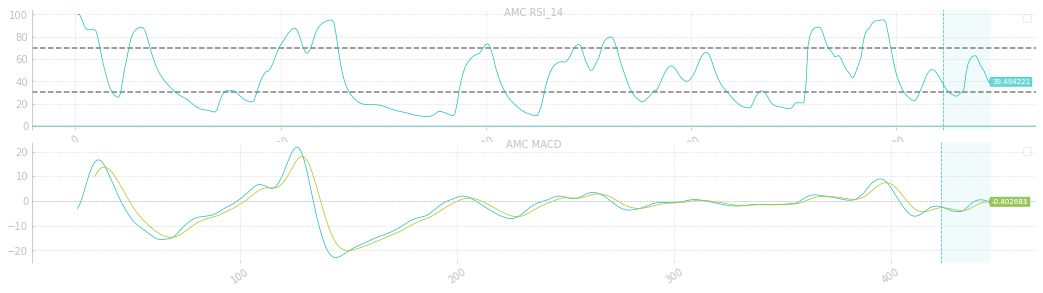

In [25]:
fig, _ = plt.subplots(facecolor=mfe.background_color)
# ax0 = plt.subplot2grid(
#     (10, 8), (0, 0),
#     rowspan=6, colspan=8,
#     facecolor=mfe.background_color
# )

    # Plot RSI
ax1 = plt.subplot2grid(
    (10, 1), (6, 0),
    rowspan=2, colspan=8,
    facecolor=mfe.background_color
)
ax1.axhline(30, linestyle='--', linewidth=1.5, color='grey')
ax1.axhline(70, linestyle='--', linewidth=1.5, color='grey')

mfe.plot(
    data=data,
    name=index_name+' RSI_14',
    plot_columns=['RSI_14'],
    axis=ax1,
    fig=fig,
    xhline_red=0.8,
    xhline_green=0.2,
    vline=dataset_train_length - 1,
    vspan=[dataset_train_length - 1, len(data.index)]
)

    # Plot MACD
ax1 = plt.subplot2grid(
    (10, 8), (8, 0),
    rowspan=2, colspan=8,
    facecolor=mfe.background_color
)

mfe.plot(
    data=data,
    name=index_name+' MACD',
    plot_columns=['MACD_12_26', 'MACDsign_12_26'],
    axis=ax1,
    fig=fig,
    xhline_dashed1=0,
    vline=dataset_train_length - 1,
    vspan=[dataset_train_length - 1, len(data.index)]
)

previous_RSI = data['RSI_14'].shift(1)
selling_RSI = (((data['RSI_14'] <= 70) & (previous_RSI >= 70)))
selling_dates_RSI = data.loc[selling_RSI, 'Item']
buying_RSI = (((data['RSI_14'] >= 30) & (previous_RSI <= 30)))
buying_dates_RSI = data.loc[buying_RSI, 'Item']
print("Buying RSI-------------------------")
print(pd.DataFrame(buying_dates_RSI))
print("Selling RSI-------------------------")
print(pd.DataFrame(selling_dates_RSI))

previous_MACD = data['MACD_12_26'].shift(1)
previous_MACD_sign = data['MACDsign_12_26'].shift(1)
selling_MACD = (((data['MACD_12_26'] <= data['MACDsign_12_26']) & (previous_MACD >= previous_MACD_sign)))
selling_dates_MACD = data.loc[selling_MACD, 'Item']
buying_MACD = (((data['MACD_12_26'] >= data['MACDsign_12_26']) & (previous_MACD <= previous_MACD_sign)))
buying_dates_MACD = data.loc[buying_MACD, 'Item']
print("Buying MACD-------------------------")
print(pd.DataFrame(buying_dates_MACD))
print("Selling MACD-------------------------")
print(pd.DataFrame(selling_dates_MACD))

plt.show()